<a href="https://colab.research.google.com/github/yfhkucing/RandomForestBMS/blob/master/model_plant_noACH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/data bms.xlsx',sheet_name='data_asli')

In [3]:
df

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp
0,0,0,171,0.5,27.0,0.0,30.02
1,0,0,153,0.4,31.5,0.0,27.44
2,0,0,47,4.8,33.1,0.0,23.44
3,0,0,62,4.1,27.4,0.0,24.63
4,0,0,341,3.8,30.6,0.0,23.94
...,...,...,...,...,...,...,...
187,1,1,163,0.9,31.4,1.0,24.30
188,1,1,210,0.1,31.3,1.0,24.21
189,1,1,247,0.3,26.7,1.0,24.92
190,1,1,265,1.0,28.1,1.0,22.16


**EDA**

In [4]:
df.describe()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,180.333333,1.883333,29.691667,0.500000,25.656823
std,0.501307,0.501307,97.809588,1.911479,2.035274,0.374406,2.462315
min,0.000000,0.000000,47.000000,0.100000,26.700000,0.000000,20.890000
25%,0.000000,0.000000,95.500000,0.375000,27.925000,0.247500,23.817500
50%,0.500000,0.500000,167.000000,0.950000,29.850000,0.500000,24.845000
75%,1.000000,1.000000,251.500000,3.875000,31.400000,0.752500,27.440000
max,1.000000,1.000000,341.000000,5.300000,33.100000,1.000000,31.610000


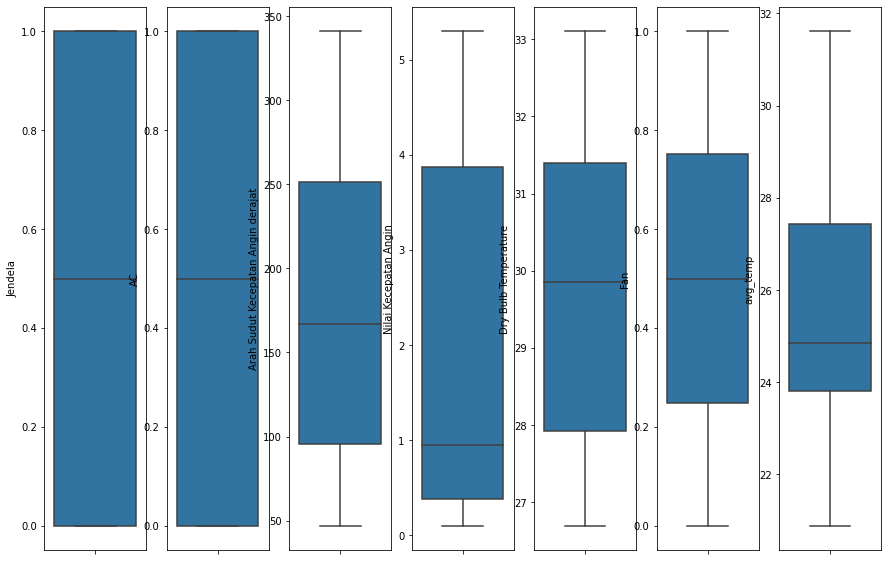

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
feature=['Jendela',
         'AC',
         'Arah Sudut Kecepatan Angin derajat',
         'Nilai Kecepatan Angin',
         'Dry Bulb Temperature',
         'Fan',	
         'avg_temp']
fig, ax =plt.subplots(1,7)
fig.set_size_inches(15, 10)
v=0
for i in feature:
    sns.boxplot(y=df[i], ax=ax[v])
    v=v+1

In [6]:
#one hot encoding
#df2 = pd.get_dummies(df['Fan'])
#df = df.join(df2)
#df.pop('Fan')
#df.rename(columns={0: 'Fan 0', 0.33: 'Fan 0.33',0.67:'Fan 0.67',1.00:'Fan 1'}, inplace=True)
#df.head()

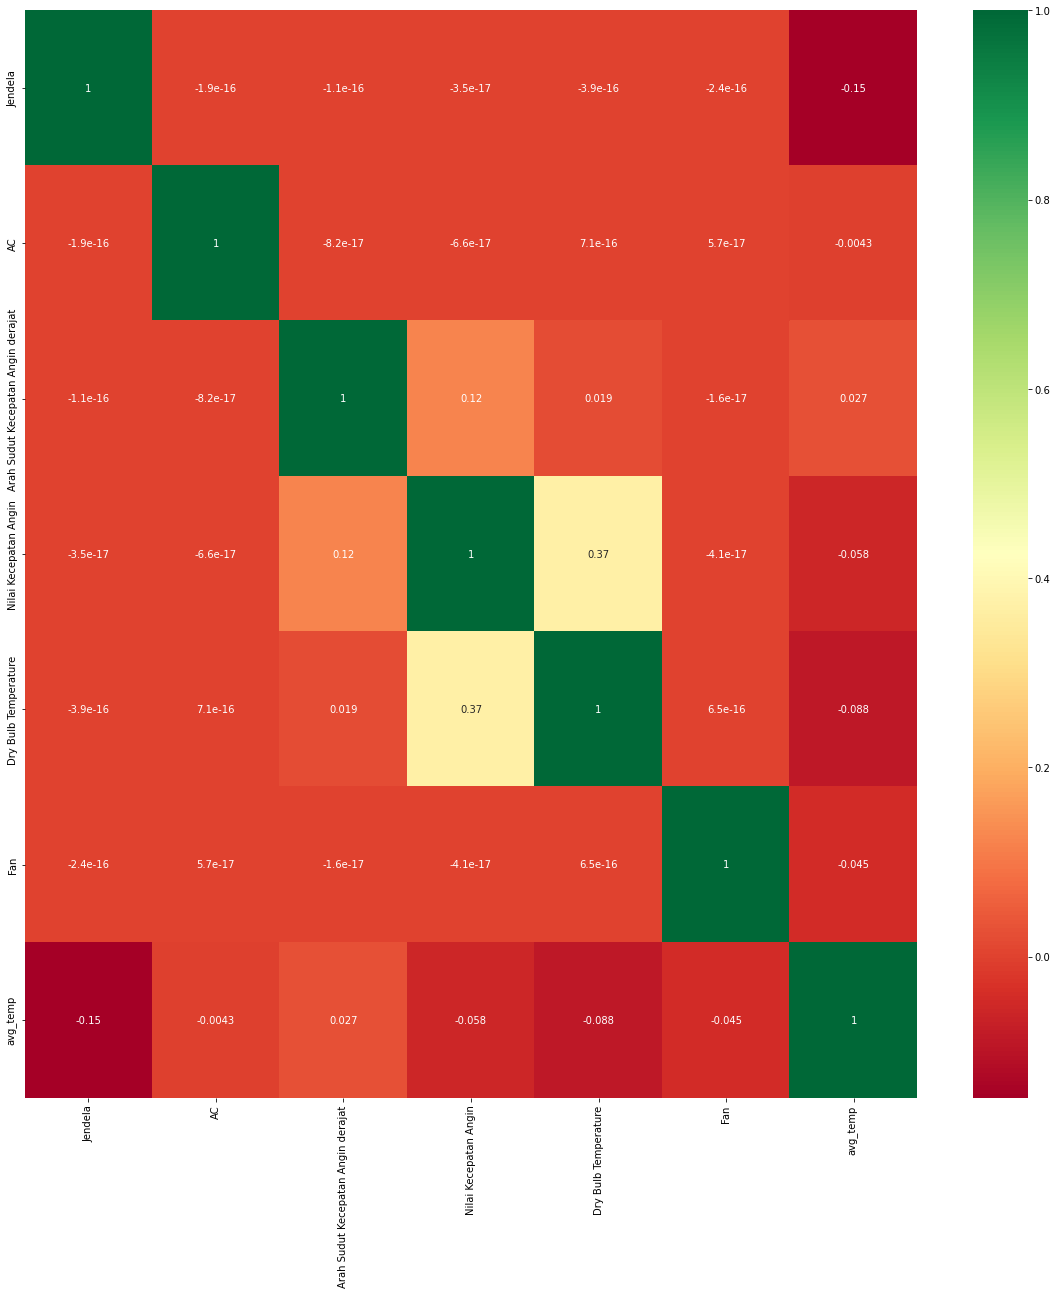

In [7]:
#before normalization
import seaborn as sns
import matplotlib.pyplot as plt
#correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#normalizing data
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan,avg_temp
0,0.0,0.0,0.421769,0.076923,0.046875,0.0,0.851679
1,0.0,0.0,0.360544,0.057692,0.750000,0.0,0.611007
2,0.0,0.0,0.000000,0.903846,1.000000,0.0,0.237873
3,0.0,0.0,0.051020,0.769231,0.109375,0.0,0.348881
4,0.0,0.0,1.000000,0.711538,0.609375,0.0,0.284515


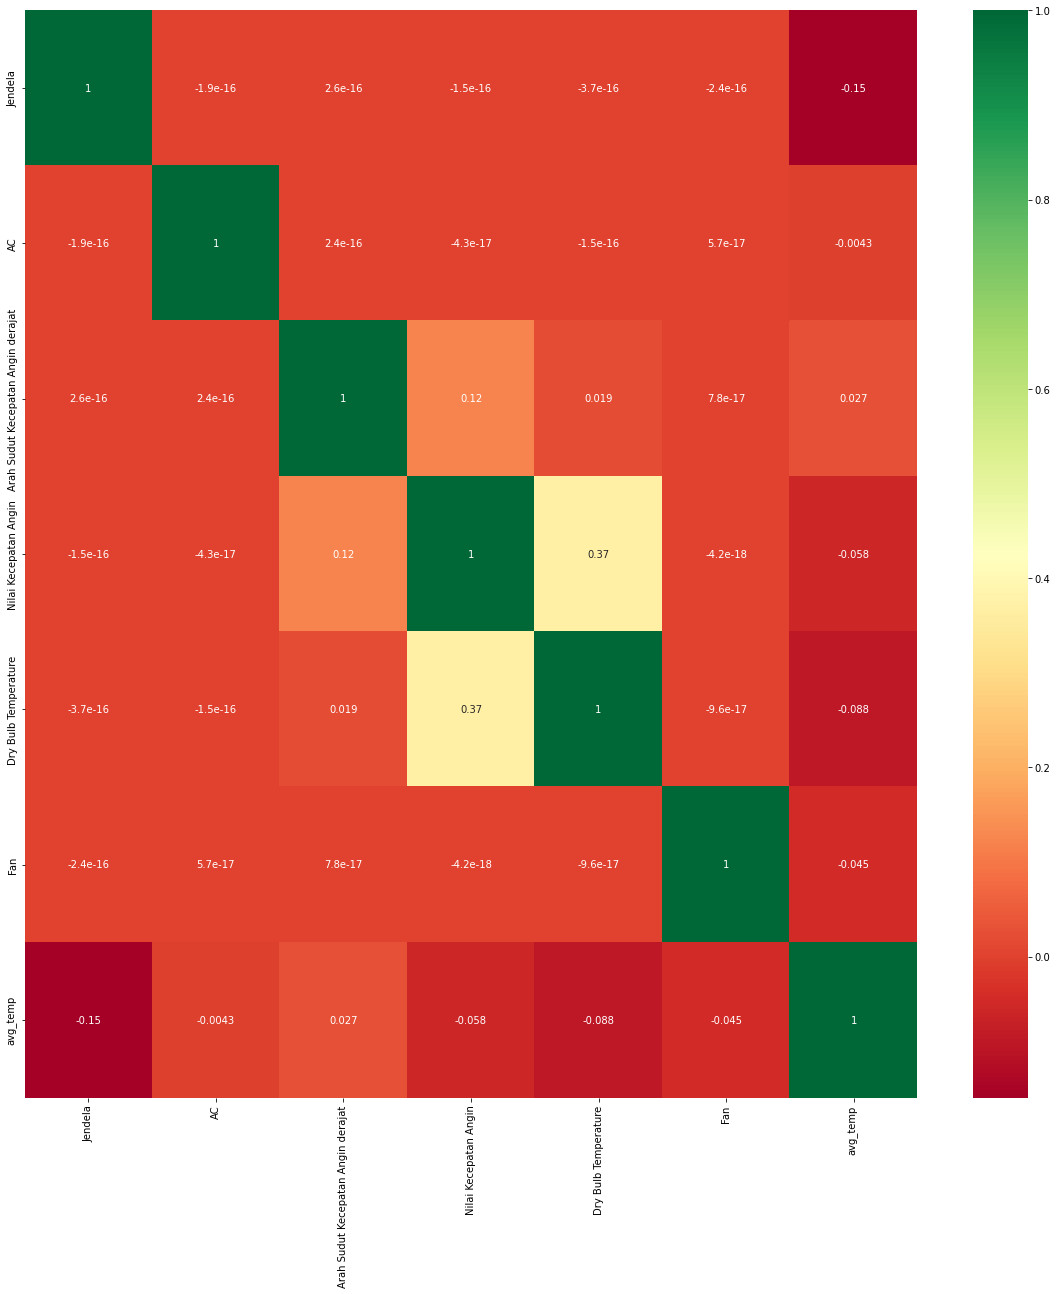

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation
corrmat = normalized_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(normalized_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**modelling the plant**

- model plant =
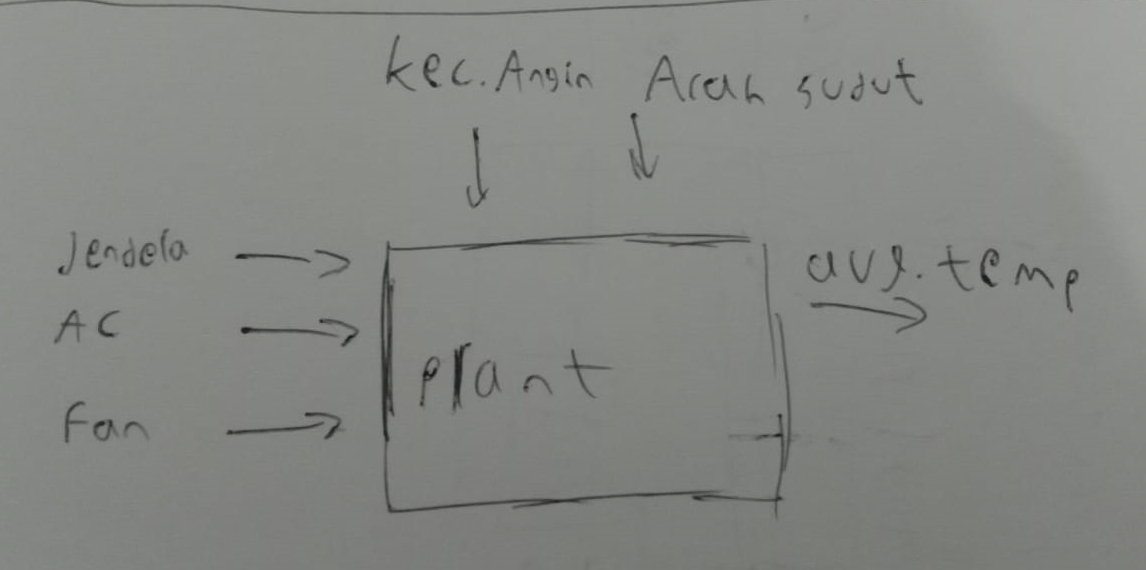

In [10]:
y = normalized_df.drop(['Jendela','AC',
             'Arah Sudut Kecepatan Angin derajat',
             'Nilai Kecepatan Angin',
             'Dry Bulb Temperature',
             'Fan'	],axis=1)

x = normalized_df.drop(['avg_temp'],axis=1)

In [ ]:
x.head()

In [ ]:
y.head()

**finding correlation**

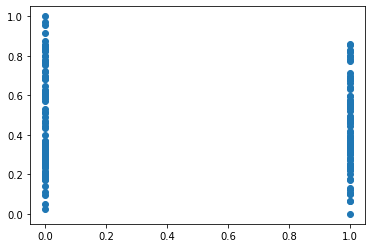

In [11]:
#jendela vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['Jendela'],y)
plt.show()

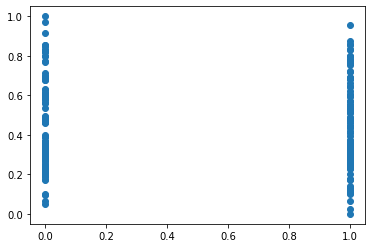

In [12]:
#ac vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['AC'],y)
plt.show()

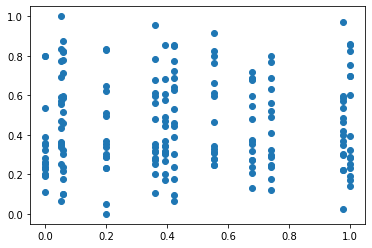

In [13]:
#arah sudut kecepatan angin vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['Arah Sudut Kecepatan Angin derajat'],y)
plt.show()

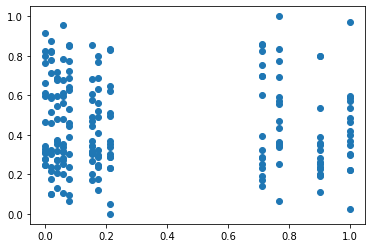

In [14]:
#nilai kecepatan angin vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['Nilai Kecepatan Angin'],y)
plt.show()

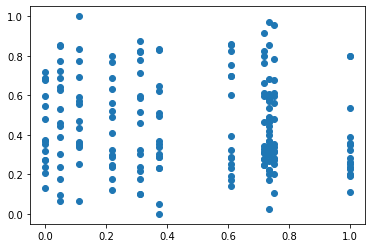

In [15]:
#dry bulb temperature vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['Dry Bulb Temperature'],y)
plt.show()

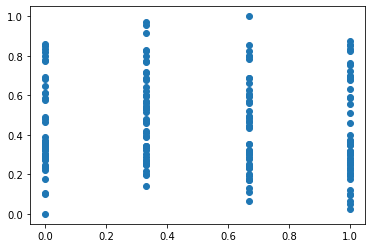

In [16]:
#fan vs avg_temp
import matplotlib.pyplot as plt
plt.scatter(x['Fan'],y)
plt.show()

**train test split**

In [17]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**random forest regressor**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [19]:
mdl = RandomForestRegressor(n_estimators=10, max_depth=10)
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [20]:
#with grid search
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(start = 11, stop = 100, num = 1)]
min_samples_split = [2,3,4,5,6,7,8,9,10]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
bootstrap = [True, False]
criterion = ['squared_error']

In [21]:
tuned_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}

In [22]:
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=2, verbose=1)

In [ ]:
clf.fit(x_train, y_train)
print(clf.best_estimator_)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


In [ ]:
print('MSE training : ' + str(clf.score(x_train,y_train)))
print('MSE testing : ' + str(clf.score(x_test,y_test)))

MSE training : 0.10133332107025583
MSE testing : -0.047083294683668564


In [ ]:
y_pred=clf.predict(x_test)

**model evaluation**

In [ ]:
#R^2
metrics.r2_score(y_test,y_pred)

-0.047083294683668564

In [ ]:
#MAE
metrics.mean_absolute_error(y_test,y_pred)

2.1890323957698863

In [ ]:
#MSE
mse = metrics.mean_squared_error(y_test,y_pred)
#RMSE
mse**0.5

2.571414179002379

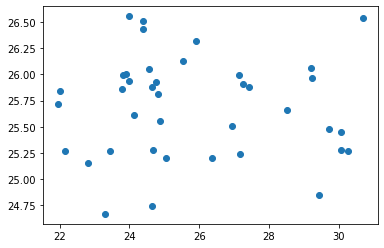

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()